### BUSINESS UNDERSTANDING
Buiding a model that classifies whether an email is a spam or not

## DATA UNDERSTANDING

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
import re
import matplotlib.pyplot as plt
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.collocations import *
import string
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import unidecode
from word2number import w2n
import contractions
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#loading our dataset
spam=pd.read_csv('Spam.csv')
pd.set_option('display.max_colwidth',100)
spam.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [3]:
#preveiwing our data set
spam.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other suggestions?"
5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week ...
5571,ham,Rofl. Its true to its name


In [4]:
spam.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [5]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


### DATA CLEANING

In [6]:
spam

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other suggestions?"
5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week ...


In [7]:
#checking for missing values
spam.isna().sum()

Category    0
Message     0
dtype: int64

In [8]:
spam.duplicated().sum()

415

In [9]:
# A function that checks for duplicates and drops them 
def check_dup(df):
    print(f'There are {df.duplicated().sum()} duplicates')

    """dropping the dupicates """
    df.drop_duplicates(inplace=True)
    
    """Checking whether the duplicates have  been dropped"""
    print(f'After droping ,there are {df.duplicated().sum()} duplicates')

In [10]:
check_dup(spam)

There are 415 duplicates
After droping ,there are 0 duplicates


#### Cleaning the texts using NLTK

In [11]:
spam

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other suggestions?"
5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week ...


#### Lowercasing

In [12]:
#lowercasing the texts
def lowercase(df,column):
    "Converting dataframe to lowercase"
    df[column]= df[column].apply(lambda x: str(x).lower())
    return df


In [13]:
lowercase(spam,'Message')


,Category,Message
0,ham,"go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there g..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive ...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives around here though"
...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u. u have won the £750 pound prize. 2 claim is easy...
5568,ham,will ü b going to esplanade fr home?
5569,ham,"pity, * was in mood for that. so...any other suggestions?"
5570,ham,the guy did some bitching but i acted like i'd be interested in buying something else next week ...


#### Removing punctuation

In [14]:
#removing punctuation in the texts
def remove_punct(text):
    text_punct= "".join([c for c in text if c not in string.punctuation])
    return text_punct





In [15]:

spam['Message']=spam['Message'].apply(lambda x:remove_punct(x))
spam.head()

,Category,Message
0,ham,go until jurong point crazy available only in bugis n great world la e buffet cine there got amo...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive e...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives around here though


#### Lemmatization

In [16]:
"""A function that does lemmatization"""
def lemmat(text):
    lemma=WordNetLemmatizer()
    tokens=re.split('\W+', text)
    text=' '.join([lemma.lemmatize(token)for token in tokens])
    return text



In [17]:
#applying lemmatization on the df
spam['Message']=spam['Message'].apply(lambda x:lemmat(x))
spam.head()

,Category,Message
0,ham,go until jurong point crazy available only in bugis n great world la e buffet cine there got amo...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive e...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he go to usf he life around here though


### Removing stopwords

In [18]:
",".join(stopwords.words('english'))
#setting the stopwords
stop_words=set(stopwords.words('english'))


In [19]:
"""A function that removes stopwords"""
def remove_stop(x):
    return " ".join( [word for word in str(x).split() if word not in stop_words])

In [20]:
spam['Message']=spam['Message'].apply(lambda x:remove_stop(x))
spam.head()

,Category,Message
0,ham,go jurong point crazy available bugis n great world la e buffet cine got amore wat
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry questions...
3,ham,u dun say early hor u c already say
4,ham,nah dont think go usf life around though


#### Removing small words

In [21]:
def remove_small_words(text):
        """This function removes words with length 1 or 2"""
        clean = re.compile(r'\b\w{1,2}\b')
        
        return re.sub(clean, '', text)

In [22]:
spam['Message']=spam['Message'].apply(lambda x:remove_small_words(x))

#### Remove numbers from text

In [23]:
def remove_numbers(text):
    """This function removes numbers from text"""
    clean = re.compile(r'\d+')
        
    return re.sub(clean, '', text)

In [24]:
spam['Message']=spam['Message'].apply(lambda x:remove_numbers(x))

### Expanding texts

In [25]:
 #expanding the texts
def expand_contractions(text):
        """Expand shortened words, e.g. don't to do not"""
        text = contractions.fix(text)
        
        return text
#Applying it on the dataframe
spam['Message']=spam['Message'].apply(lambda x:expand_contractions(x))

In [26]:
# Tokenizing the text

# Creating a pattern for tokenization
basic_token_pattern = r"(?u)\b\w\w+\b"

tokenizer = RegexpTokenizer(basic_token_pattern)

doc_tokenized = pd.DataFrame(spam['Message'].apply(tokenizer.tokenize))
doc_tokenized.columns=['Message']
# previewing the changes
doc_tokenized

,Message
0,"[jurong, point, crazy, available, bugis, great, world, buffet, cine, got, amore, wat]"
1,"[lar, joking, wif, oni]"
2,"[free, entry, wkly, comp, win, cup, final, tkts, st, may, text, receive, entry, questionstd, txt..."
3,"[dun, say, early, hor, already, say]"
4,"[nah, do, not, think, usf, life, around, though]"
...,...
5567,"[nd, time, tried, contact, pound, prize, claim, easy, call, now, per, minute, btnationalrate]"
5568,"[going, esplanade, home]"
5569,"[pity, mood, soany, suggestion]"
5570,"[guy, bitching, acted, like, interested, buying, something, else, next, week, gave, free]"


In [27]:
def get_word_cloud(df, col):
        words = []
        for message in df[col]:
            words.extend([word for word in message if word not in STOPWORDS])
        plt.figure(figsize=(20,12))        
        wordcloud = WordCloud(max_words = 200, width = 1500, height = 800).generate(" ".join(words))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.tight_layout(pad=0)
        plt.show()

#### Word cloud on the Messages

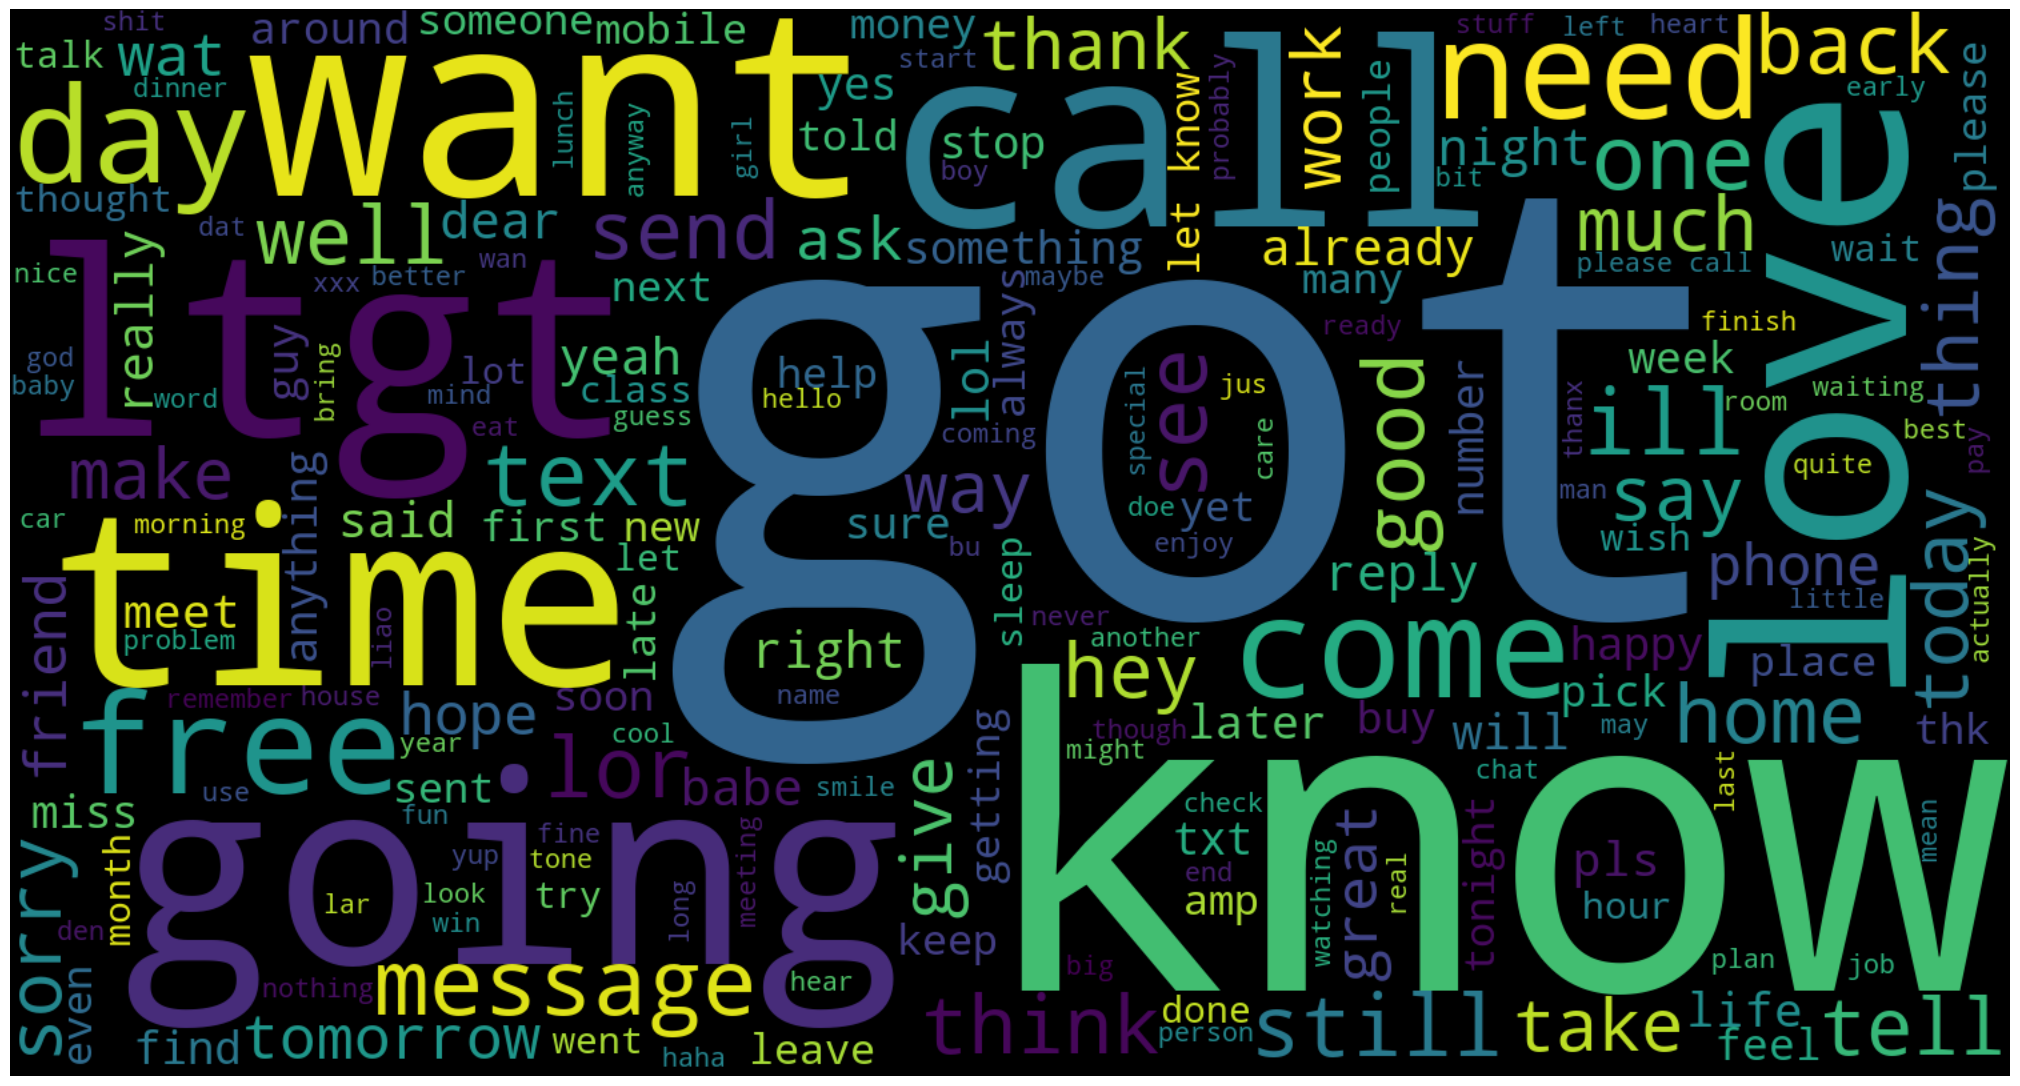

In [28]:
get_word_cloud(doc_tokenized,'Message')

#### Modelling

In [29]:
spam

,Category,Message
0,ham,jurong point crazy available bugis great world buffet cine got amore wat
1,ham,lar joking wif oni
2,spam,free entry wkly comp win cup final tkts st may text receive entry questionstd txt ratetcs a...
3,ham,dun say early hor already say
4,ham,nah do not think usf life around though
...,...,...
5567,spam,nd time tried contact pound prize claim easy call now p per minute btnationalrate
5568,ham,going esplanade home
5569,ham,pity mood soany suggestion
5570,ham,guy bitching acted like interested buying something else next week gave free


In [30]:
#labeling categories 
spam['Label']=spam['Category'].map({'ham':0,'spam':1})
spam.head()

,Category,Message,Label
0,ham,jurong point crazy available bugis great world buffet cine got amore wat,0
1,ham,lar joking wif oni,0
2,spam,free entry wkly comp win cup final tkts st may text receive entry questionstd txt ratetcs a...,1
3,ham,dun say early hor already say,0
4,ham,nah do not think usf life around though,0


In [31]:
X=spam['Message']
y=spam['Label']

### Checking for class imbalance

In [32]:
y.value_counts()

0    4516
1     641
Name: Label, dtype: int64

<AxesSubplot: xlabel='Label', ylabel='count'>

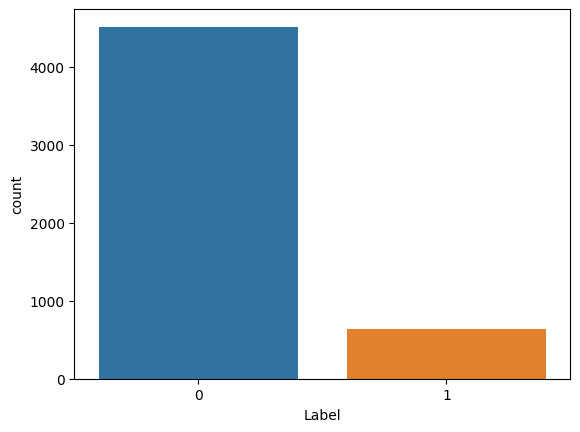

In [33]:
 sns.countplot(x='Label',data=spam, order=spam['Label'].value_counts().iloc[:100].index)

There is a high percentage of imbalance hence for better perfomance of the model we will have to make sure the class is balanced

In [34]:
# vectorizing features
vectorizer=TfidfVectorizer()
X_vect=vectorizer.fit_transform(X)


In [35]:
# Splitting our features into test and 
X_train,X_test,y_train,y_test=train_test_split(X_vect,y,test_size=0.3,random_state=42)

In [36]:
#converting both X_train and X_test to array
X_train=X_train.toarray()
print(X_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [37]:
 X_test=X_test.toarray()
 print(X_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Applying SMOTE to balance the dataset

In [38]:
#instantiating smote
smo=SMOTE()
#appying smote
X_train_smo, y_train_smo = smo.fit_resample(X_train, y_train)
#checking if the class is balanced
Counter(y_train_smo)

Counter({0: 3171, 1: 3171})

## Building our model

## Logistic regression

In [51]:
def load_model(clf,classifier,xtrain,ytrain,xtest,y_pred,ytest):
    "instaniating the model"
    clf=classifier()

    "fitting the model"
    clf.fit(xtrain,ytrain)

    "doing the prediction "
    ypred=clf.predict(xtest)
    print('predictions____')
    print(ypred)
    print('---------------')

    "calculating the accuracy score"
    f1=f1_score(ytest,ypred)
    print(f'The f1 score is {f1}')

    "Computing the classification metrics"
    print('----------------')
    print('Classification Metrics')
    print(classification_report(ytest,ypred))

    print('------------------')
    cm = confusion_matrix(ytest, ypred, labels=clf.classes_)

    print('Confusion Matrix display')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=clf.classes_)
    disp.plot()
    plt.show()



In [50]:
load_model(LogisticRegression,X_train_smo,y_train_smo,X_test,y_pred,y_test)

NameError: name 'y_pred' is not defined

In [ ]:
def load_model(classifier,xtrain,ytrain,xtest,ypred,ytest):
    "instaniating the model"
    clf=classifier()

    "fitting the model"
    clf.fit(xtrain,ytrain)

    "doing the prediction "
    ypred=clf.predict(xtest)
    print('predictions____')
    print(ypred)
    print('---------------')

    "calculating the accuracy score"
    f1=f1_score(ytest,ypred)
    print(f'The f1 score is {f1}')

    "Computing the classification metrics"
    print('----------------')
    print('Classification Metrics')
    print(classification_report(ytest,ypred))

    print('------------------')
    cm = confusion_matrix(ytest, ypred, labels=clf.classes_)

    print('Confusion Matrix display')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=clf.classes_)
    disp.plot()
    plt.show()

In [ ]:
load_model(LogisticRegression,X_train_smo,y_train_smo,X_test,y_pred,y_test)

NameError: name 'y_pred' is not defined

In [ ]:
load_model(lr_cv,LogisticRegressionCV,X_train_smo,y_train_smo,X_test,y_pred,y_test)

NameError: name 'y_pred' is not defined

Our logistic model is perfoming well,with a 0.96 on the accuracy score

### LogisticRegression CV
This is a cross validated version of the normal logistic regression

TypeError: load_model() missing 1 required positional argument: 'ytest'

In [ ]:
load_model(lr_cv,LogisticRegressionCV,X_train_smo,y_train_smo,X_test,y_pred,y_test)

NameError: name 'y_pred' is not defined

## Naive Bayes Classifier

In [43]:
def load_model(clf,classifier,xtrain,ytrain,xtest,ypred,ytest):
    "instaniating the model"
    clf=classifier()

    "fitting the model"
    clf.fit(xtrain,ytrain)

    "doing the prediction "
    ypred=clf.predict(xtest)
    print('predictions____')
    print(ypred)
    print('---------------')

    "calculating the accuracy score"
    f1=f1_score(ytest,ypred)
    print(f'The f1 score is {f1}')

    "Computing the classification metrics"
    print('----------------')
    print('Classification Metrics')
    print(classification_report(ytest,ypred))

    print('------------------')
    cm = confusion_matrix(ytest, ypred, labels=clf.classes_)

    print('Confusion Matrix display')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=clf.classes_)
    disp.plot()
    plt.show()


In [44]:
gnb=GaussianNB()

In [46]:

load_model(gnb, GaussianNB,X_train_smo,y_train_smo,X_test,y_pred,y_test)

NameError: name 'ypred' is not defined

predictions____
[0 0 0 ... 0 0 0]
---------------
The f1 score is 0.8029330889092576
----------------
Classification Metrics
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      3171
           1       0.67      1.00      0.80       438

    accuracy                           0.94      3609
   macro avg       0.84      0.97      0.88      3609
weighted avg       0.96      0.94      0.95      3609

------------------
Confusion Matrix display


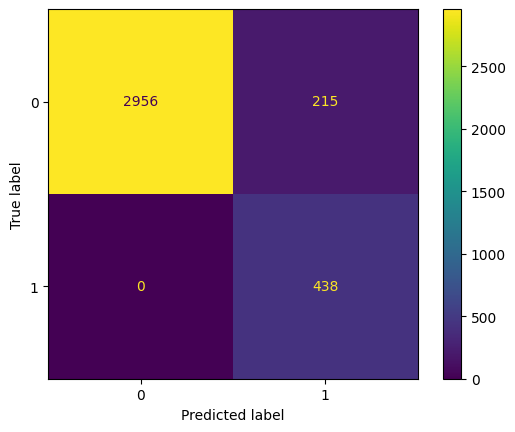

In [ ]:

load_model(gnb, GaussianNB,X_train_smo,y_train_smo,X_train,y_pred_train,y_train)

hyperparamater tuning to improve our model


In [ ]:
###Hyperparameter tuning our  naive bayes
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

from sklearn.preprocessing import PowerTransformer
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=gnb, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='f1')

test_transformed = PowerTransformer().fit_transform(X_test)

gs_NB.fit(test_transformed, y_test);

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


In [ ]:
gs_NB.best_score_

0.6234302211265106

### SVM(Support Vector Machine)

In [ ]:
#instantiating the classifier
sv=svm.SVC()

predictions____
[0 0 0 ... 0 0 0]
---------------
The f1 score is 0.8657534246575344
----------------
Classification Metrics
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1345
           1       0.98      0.78      0.87       203

    accuracy                           0.97      1548
   macro avg       0.97      0.89      0.92      1548
weighted avg       0.97      0.97      0.97      1548

------------------
Confusion Matrix display


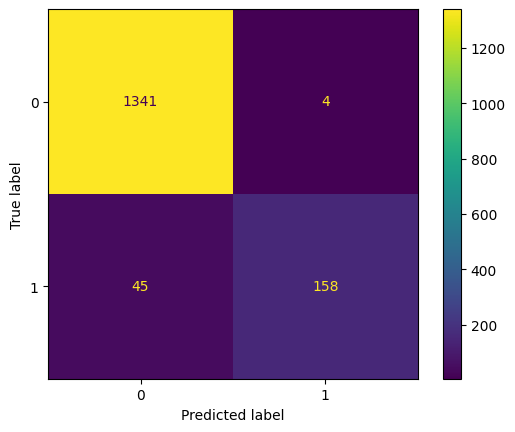

In [ ]:

load_model(sv,svm.SVC,X_train_smo,y_train_smo,X_test,y_pred,y_test)

### SVM with GridSearch CV

In [ ]:
from sklearn.model_selection import GridSearchCV
#creating a dictionaries wirh gamma,kernel,C
param_grid = {'C': [0.1,1, 10], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'linear']}

#creating a gridsearch object
grid = GridSearchCV(svm.SVC(),param_grid,refit=True,verbose=2)

#fitting into train and test data
grid.fit(X_train_smo,y_train_smo)
print(grid.best_estimator_)

#getting the predictions
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

NameError: name 'svm' is not defined